# Brazilian E-Commerce Public Dataset by Olist
- **분석 목적 및 목표**
    - E-Commerce 데이터를 활용하여, EDA를 통해 패턴을 파악한다. 또한, 코호트, 퍼널, RFM 분석 등을 실시하고 예측 모델까지 추후 탐색해 본다.

## TASK 1. 데이터 출처 설명 / 데이터 불러오기
- https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
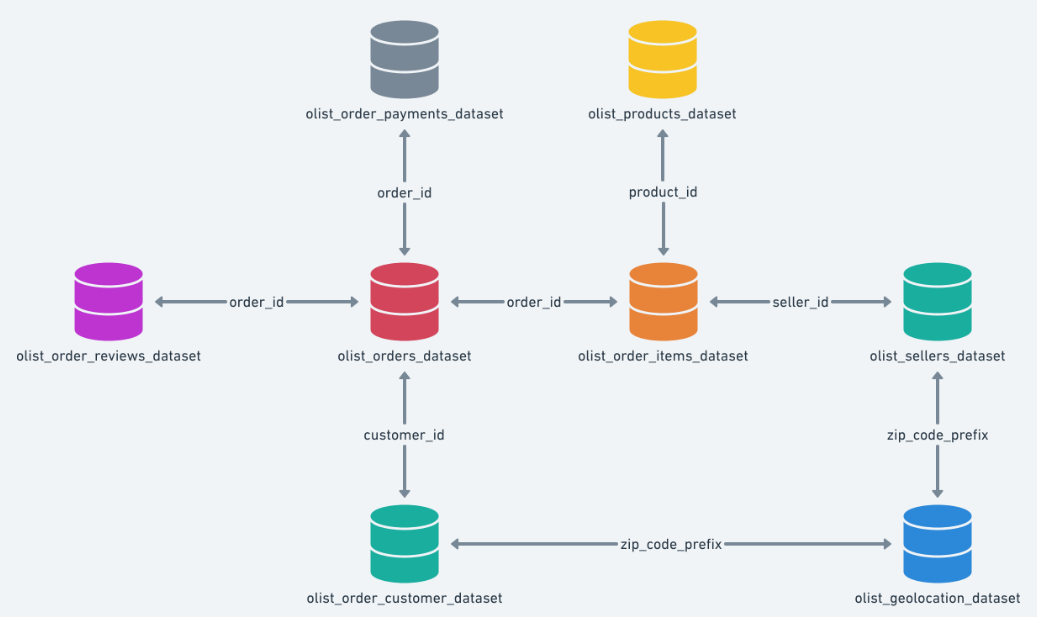

In [6]:
import numpy as np
import pandas as pd
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%matplotlib inline

import os

from datetime import datetime
from datetime import timedelta
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option("display.max_columns", None)

plt.rc('font', family='Noto Sans')
plt.rcParams['axes.unicode_minus'] = False

### 1-1. 여러개의 데이터셋 불러오기
- 데이터셋의 개수가 많기 때문에, `for loop`을 통해 불러온다

In [7]:
# data 폴더로 이동 (csv 파일 존재)
os.chdir("../data")

In [8]:
path = os.getcwd()
csv_dir_name = os.path.abspath(path)

In [9]:
csv_list = os.listdir()[:-1]

for csv_name in csv_list:
    # csv 파일 경로 불러오기
    file_path = os.path.join(csv_dir_name, csv_name)

    # .csv를 _df로 replace
    df_name = csv_name.replace("_dataset.csv", "_df")

    # 데이터 프레임 이름 자동 변수 생성 후 데이터셋 불러오기
    globals()[f"{df_name}"] = pd.read_csv(file_path)
    print(df_name)

olist_customers_df
olist_geolocation_df
olist_orders_df
olist_order_items_df
olist_order_payments_df
olist_order_reviews_df
olist_products_df
olist_sellers_df


In [10]:
olist_customers_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [11]:
olist_geolocation_df.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [12]:
olist_orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [13]:
olist_order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [14]:
olist_order_payments_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [15]:
olist_order_reviews_df.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [16]:
olist_products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [17]:
olist_sellers_df.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


## TASK 2. 기초 통계 확인

### 2-1. 결측치 확인


In [18]:
print("olist_customers_df 결측치: \n",olist_customers_df.isnull().sum(), "\n")
print("olist_geolocation_df 결측치: \n", olist_geolocation_df.isnull().sum(), "\n")
print("olist_orders_df 결측치: \n", olist_orders_df.isnull().sum(), "\n")

olist_customers_df 결측치: 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

olist_geolocation_df 결측치: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

olist_orders_df 결측치: 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 



In [19]:
print("olist_order_items_df 결측치: \n", olist_order_items_df.isnull().sum(), "\n")
print("olist_order_payments_df 결측치: \n", olist_order_payments_df.isnull().sum(), "\n")
print("olist_order_reviews_df 결측치: \n", olist_order_reviews_df.isnull().sum(), "\n")

olist_order_items_df 결측치: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

olist_order_payments_df 결측치: 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

olist_order_reviews_df 결측치: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 



In [20]:
print("olist_products_df 결측치: \n", olist_products_df.isnull().sum(), "\n")
print("olist_sellers_df 결측치: \n", olist_sellers_df.isnull().sum(), "\n")

olist_products_df 결측치: 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

olist_sellers_df 결측치: 
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64 



### 2-2. 데이터셋 Merge
- olist_customers_df
- olist_orders_df
- olist_order_items_df
- olist_order_payments_df
- olist_products_df

In [21]:
print("olist_customers_df shape:", olist_customers_df.shape, "\n")
print("olist_orders_df shape:", olist_orders_df.shape, "\n")
print("olist_order_items_df shape:", olist_order_items_df.shape, "\n")
print("olist_order_payments_df shape:", olist_order_payments_df.shape, "\n")
print("olist_products_df shape:", olist_products_df.shape, "\n")

olist_customers_df shape: (99441, 5) 

olist_orders_df shape: (99441, 8) 

olist_order_items_df shape: (112650, 7) 

olist_order_payments_df shape: (103886, 5) 

olist_products_df shape: (32951, 9) 



In [22]:
order_customer_df = pd.merge(olist_orders_df, olist_customers_df)
order_customer_df.shape

(99441, 12)

In [23]:
order_customer_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [24]:
order_customer_df[order_customer_df["order_id"]=="11c177c8e97725db2631073c19f07b62"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [25]:
olist_order_items_df[olist_order_items_df["order_id"]=="11c177c8e97725db2631073c19f07b62"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7844,11c177c8e97725db2631073c19f07b62,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
7845,11c177c8e97725db2631073c19f07b62,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [26]:
# order_customer_df과 olist_order_items_df는 Left Join
order_customer_items = pd.merge(order_customer_df, olist_order_items_df, how="left", on="order_id")
order_customer_items.shape

(113425, 18)

In [27]:
# order_customer_items과 olist_order_payments_df Join
order_customer_items_payments = pd.merge(order_customer_items, olist_order_payments_df)
order_customer_items_payments.shape

(118431, 22)

In [28]:
total_merged = pd.merge(order_customer_items_payments, olist_products_df)
total_merged.shape

(117601, 30)

### 2-3. 기초 통계 확인

In [29]:
total_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   customer_unique_id             117601 non-null  object 
 9   customer_zip_code_prefix       117601 non-null  int64  
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  order_item_id                 

In [30]:
total_merged.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,115903.000000,115903.000000,115903.000000,117581.000000,117581.000000,117581.000000,117581.000000
mean,35051.793097,1.195900,120.824783,20.045990,1.093528,2.939482,172.686752,48.767590,786.950855,2.207881,2114.309497,30.257235,16.630306,23.068574
std,29820.588877,0.697706,184.479323,15.861315,0.726692,2.774223,267.592290,10.035011,653.036231,1.719531,3788.798201,16.190920,13.458952,11.748468
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11310.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24315.000000,1.000000,74.900000,16.290000,1.000000,2.000000,108.210000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,58600.000000,1.000000,134.900000,21.190000,1.000000,4.000000,189.260000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
total_merged.describe(include="object")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,product_id,seller_id,shipping_limit_date,payment_type,product_category_name
count,117601,117601,117601,117601,117586,116356,115034,117601,117601,117601,117601,117601,117601,117601,117601,115903
unique,98665,98665,7,98111,90173,81016,95663,449,95419,4110,27,32951,3095,93317,4,73
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,credit_card,cama_mesa_banho
freq,63,63,115035,63,63,63,63,649,75,18590,49566,536,2133,63,86769,11823


In [34]:
# 결측치 확인
total_merged.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weig

## TASK 3. 분석 목적/인사이트
- 제품, 결제 수단, 주문 등의 특징을 파악한다
- 퍼널 분석, 코호트 분석, RFM 분석 등을 실시한다.
- 일단 결측치는 얼마 없어서 따로 대체하지 않고 제거해도 괜찮을 듯
    - `merge` 과정을 다시 한번 살펴서 누락되거나 중복된 데이터가 있는지 다시 확인해본다

In [35]:
# 데이터셋 저장
total_merged.to_csv("total_merged.csv")